#Adicionando as bibliotecas necessárias...

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Importando e fazendo a limpeza dos dados

In [56]:
dataset = pd.read_csv('./autism_screening.csv')
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [57]:
# análise dos dados
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [58]:
# removendo algumas colunas irrelevantes e renomeando outras para melhorar a legibilidade
dataset = dataset.drop(columns =['ethnicity', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'result'])
dataset = dataset.rename(columns={'austim': 'autism_history', 'Class/ASD': 'autism'})
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,NO


In [59]:
# analisando os valores únicos de cada coluna
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


In [60]:
# juntando colunas de valores similares e removendo colunas com nan
dataset = dataset.replace(383., np.nan)
dataset = dataset.dropna()

# analisando os novos dados
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [26. 24. 27. 35. 40. 36. 17. 64. 29. 33. 18. 31. 30. 34. 38. 42. 43. 48.
 37. 55. 50. 53. 20. 28. 21. 47. 32. 44. 19. 58. 45. 22. 39. 25. 23. 54.
 60. 41. 46. 56. 61. 59. 52. 49. 51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


In [61]:
# analisando o tipo dos dados
print(dataset.dtypes)

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age               float64
gender             object
jundice            object
autism_history     object
autism             object
dtype: object


In [62]:
# convertendo float64 para int64
cols_to_convert = ['age']
dataset[cols_to_convert] = dataset[cols_to_convert].astype('int64')
print(dataset.dtypes)

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age                int64
gender            object
jundice           object
autism_history    object
autism            object
dtype: object


In [ ]:
# fazendo label encoding nas colunas
label_encoder = LabelEncoder()
dataset[['autism', 'autism_history', 'gender', 'jundice']] = dataset[['autism', 'autism_history', 'gender', 'jundice']].apply(label_encoder.fit_transform)
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0


#Dividindo os dados em conjuntos de treinamento e de testes

In [64]:
X = dataset.drop(columns=['autism'])
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism_history
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0


In [65]:
y = dataset['autism']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: autism, dtype: int64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Treinamento do modelo de árvore de decisão

In [67]:
model = DecisionTreeClassifier(
    class_weight="balanced",
    criterion="gini",        
    max_depth=10,           
    min_samples_split=5,      
    random_state=30           
)

model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=30)

Acurácia: 0.8862559241706162
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       154
           1       0.75      0.86      0.80        57

    accuracy                           0.89       211
   macro avg       0.85      0.88      0.86       211
weighted avg       0.89      0.89      0.89       211

Acurácia média na validação cruzada: 0.9143667679837894


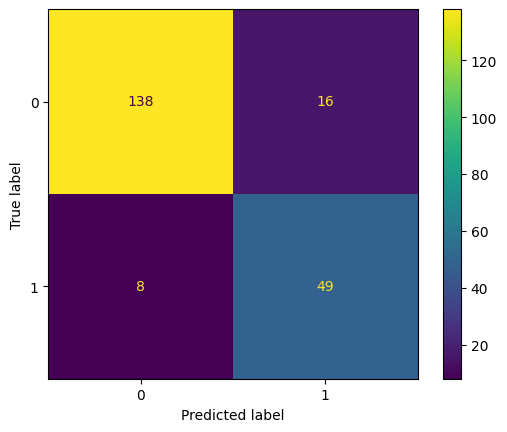

In [68]:
y_pred = model.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

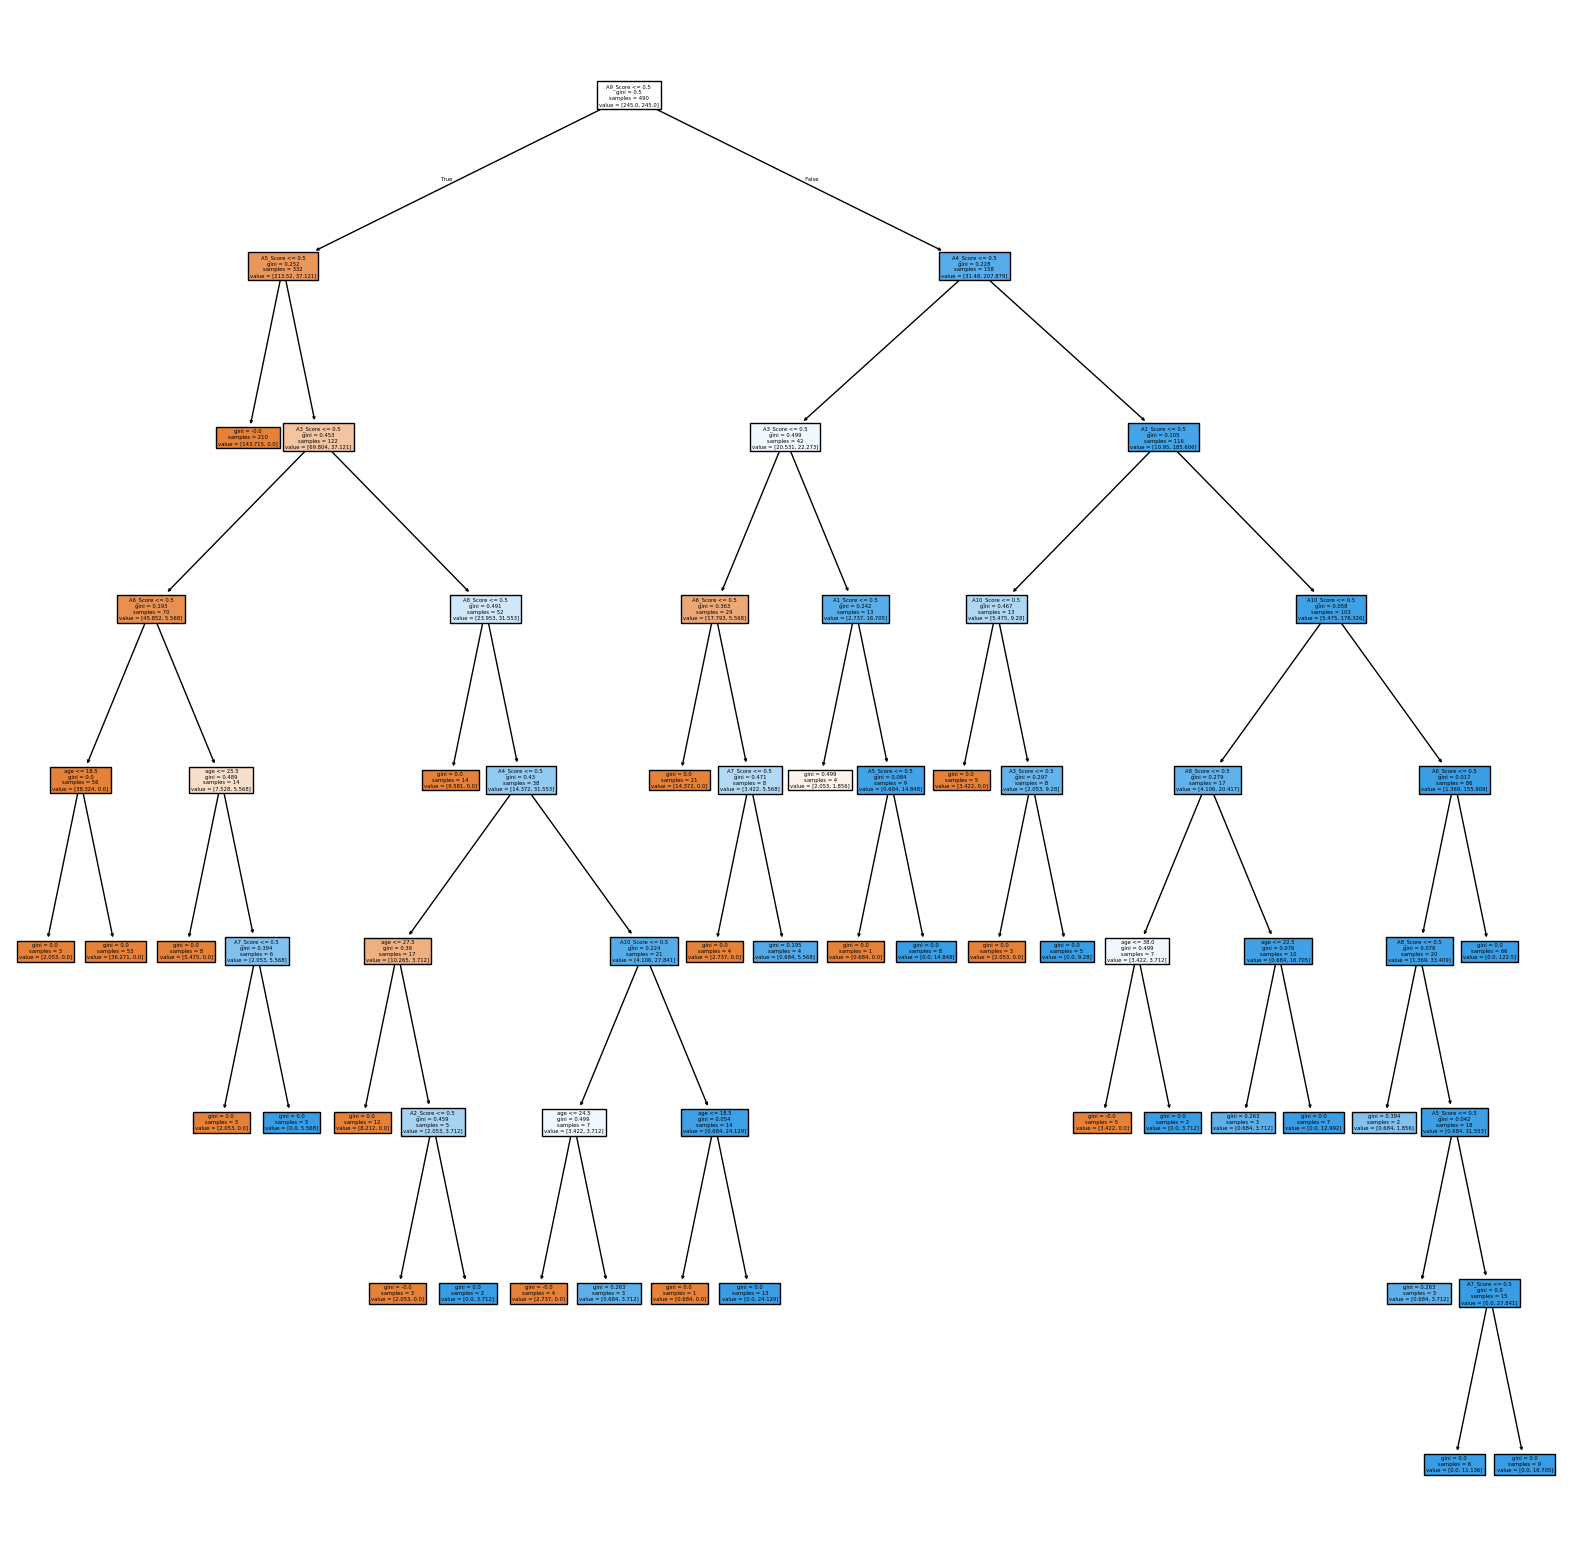

In [69]:
# plotar a árvore
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

#Treinando o modelo de gradient boosting

Acurácia: 0.95260663507109
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       154
           1       0.90      0.93      0.91        57

    accuracy                           0.95       211
   macro avg       0.94      0.95      0.94       211
weighted avg       0.95      0.95      0.95       211

Acurácia média na validação cruzada: 0.9614792299898683


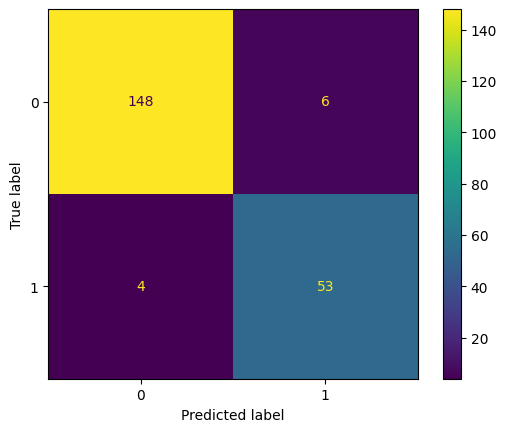

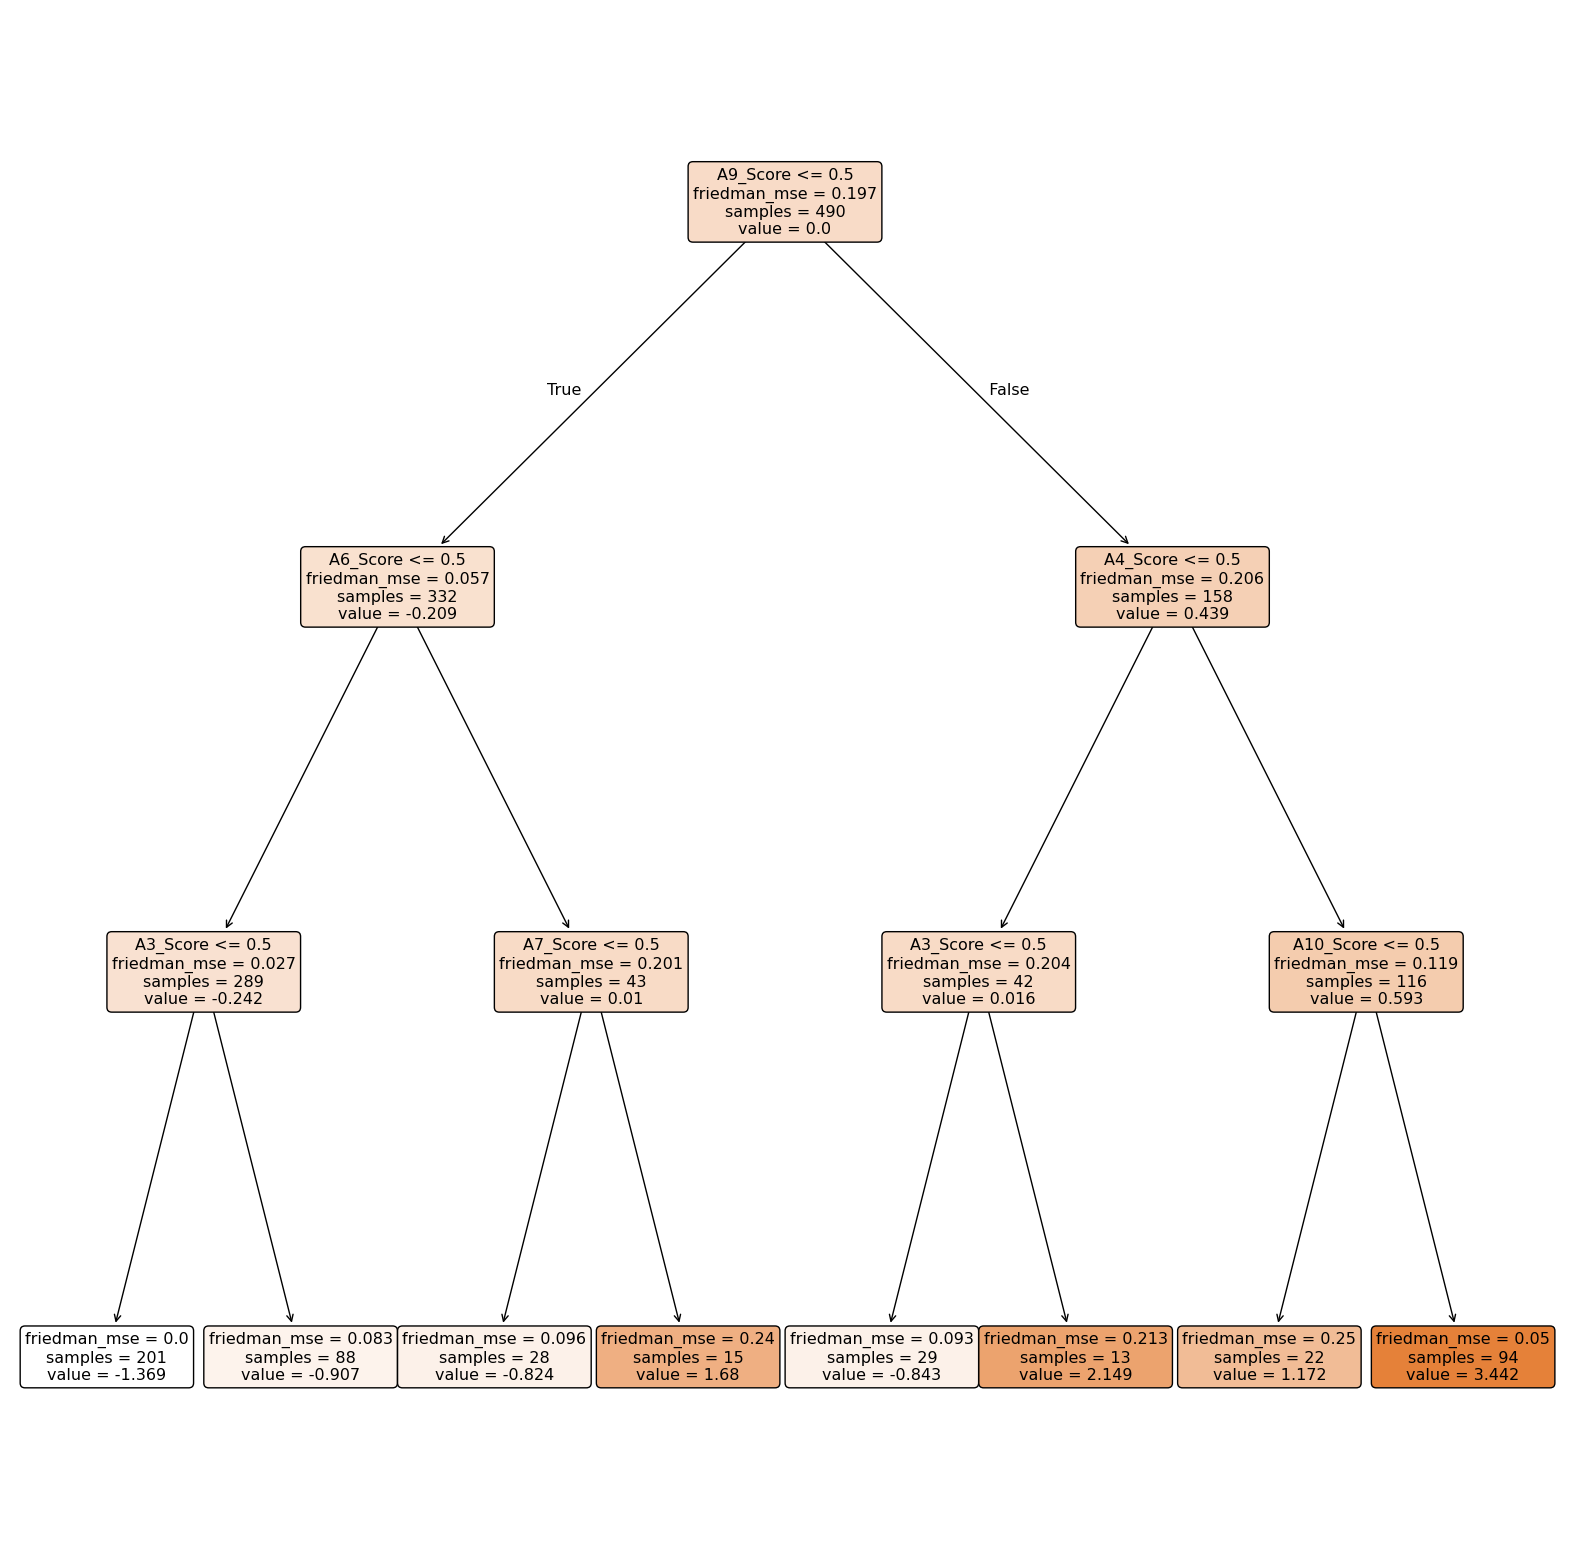

In [70]:
gbmc = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = gbmc.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(gbmc, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

tree = gbmc.estimators_[0, 0] 
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

#Treinando o modelo de random forest

Acurácia: 0.933649289099526
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       154
           1       0.89      0.86      0.88        57

    accuracy                           0.93       211
   macro avg       0.92      0.91      0.91       211
weighted avg       0.93      0.93      0.93       211

Acurácia média na validação cruzada: 0.9143667679837894


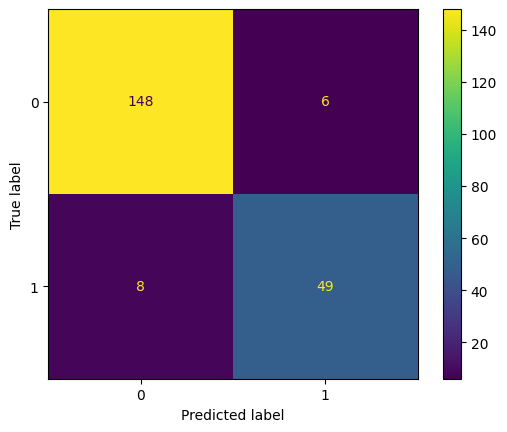

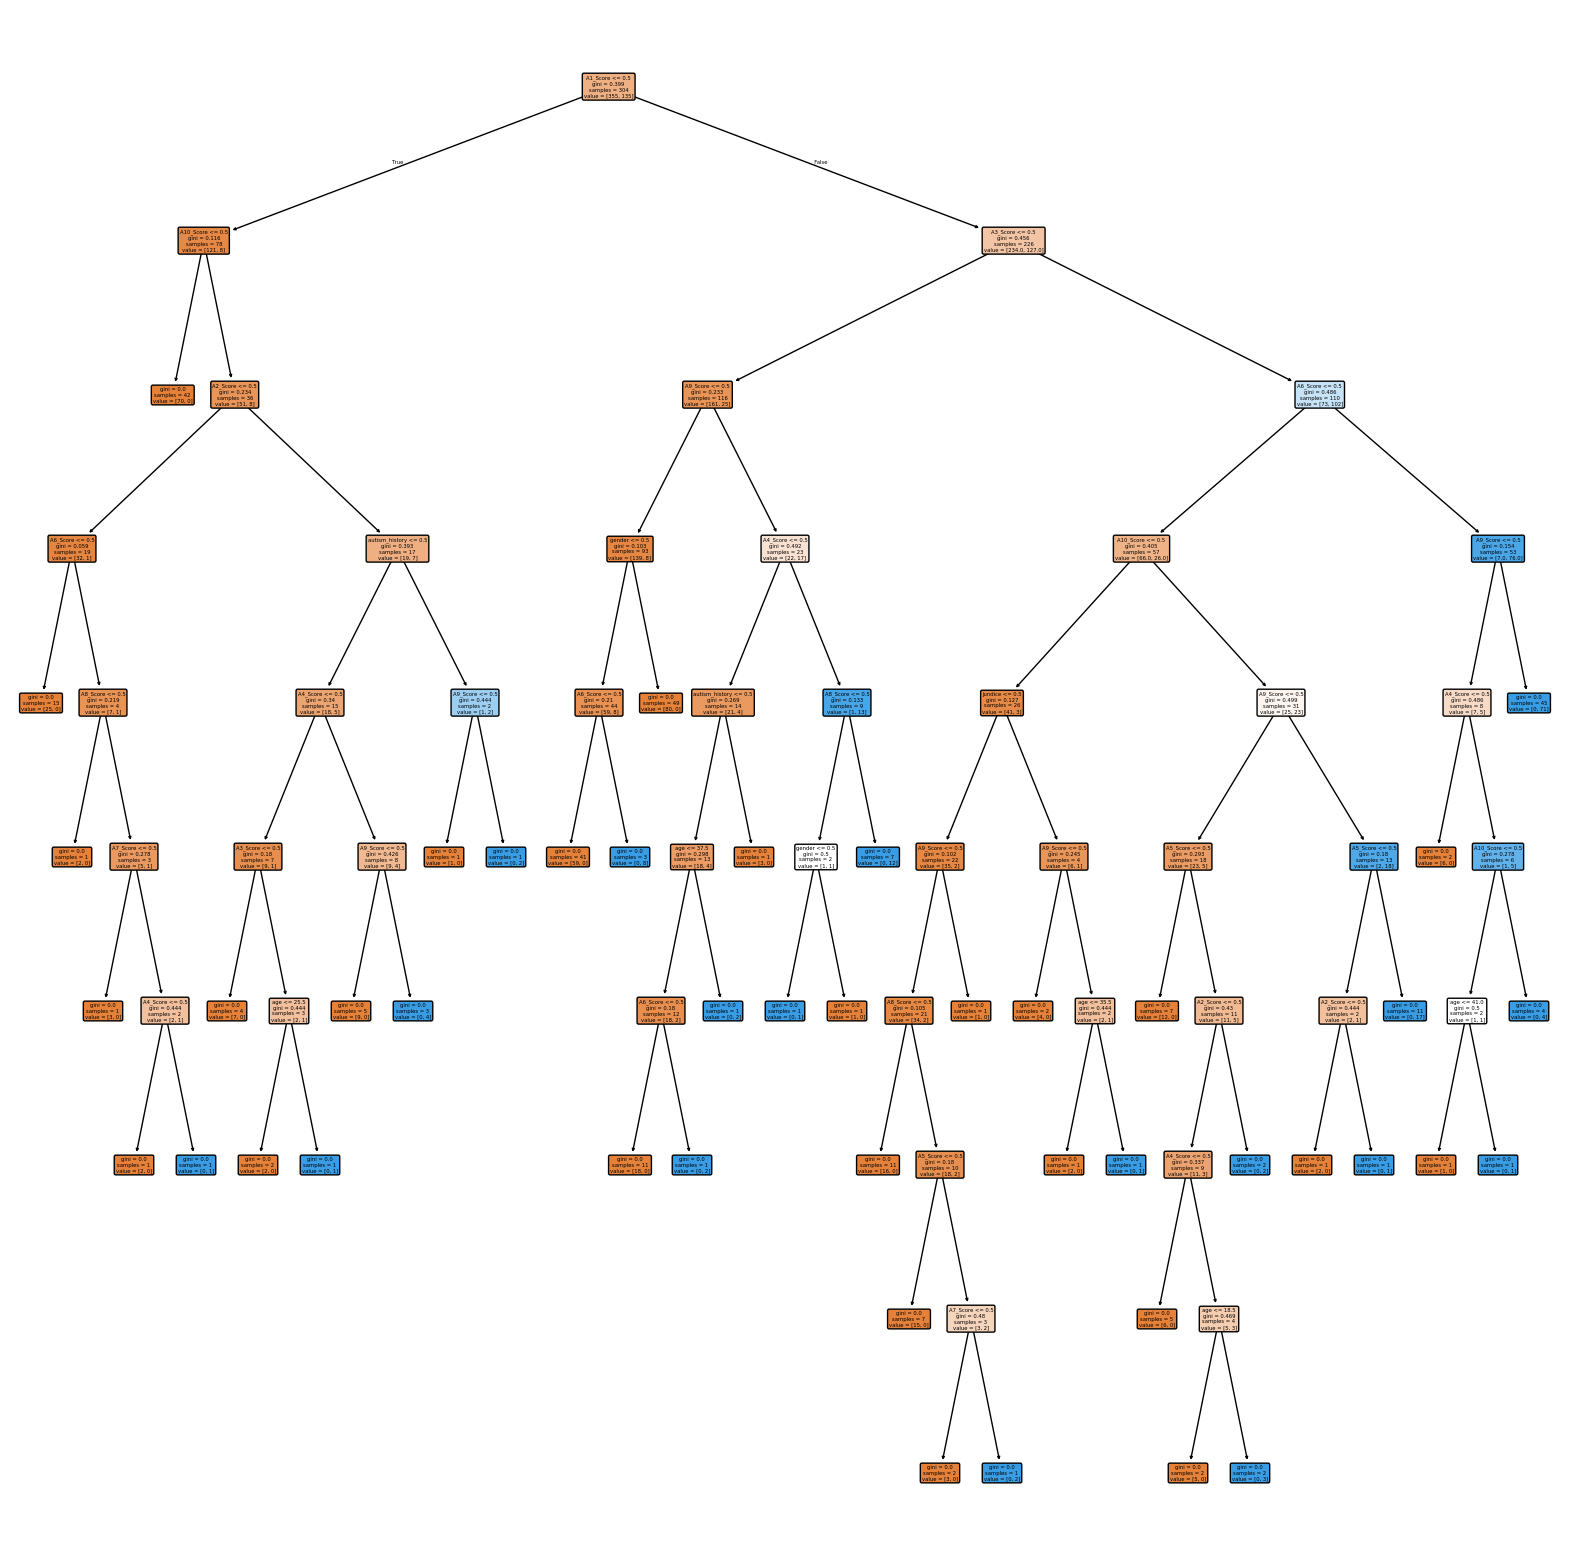

In [71]:
rf = RandomForestClassifier(
  random_state=42,
  criterion='gini',
  max_depth=13,
  )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

tree = rf.estimators_[0]
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

#Classificando os resultados

A1_Score: 0.0376
A2_Score: 0.0139
A3_Score: 0.0822
A4_Score: 0.0825
A5_Score: 0.0762
A6_Score: 0.1256
A7_Score: 0.0347
A8_Score: 0.0384
A9_Score: 0.4484
A10_Score: 0.0289
age: 0.0245
gender: 0.0009
jundice: 0.0002
autism_history: 0.0061


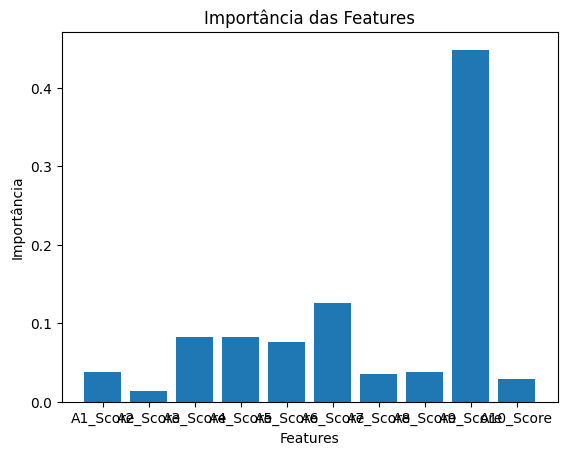

In [72]:
importances = gbmc.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
    
colunas_desejadas = [
  'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 
  'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'
  ]
importancias_filtradas = [importances[X.columns.get_loc(col)] for col in colunas_desejadas]

plt.bar(colunas_desejadas, importancias_filtradas)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.show()